The industrial sector is a significant contributor to global carbon emissions and energy consumption. However, there is considerable variability in how different countries manage these impacts. Some countries exhibit high levels of efficiency and low carbon intensity, while others struggle with high emissions and energy usage. This disparity reflects underlying differences in technology, policy, economic development, and industrial practices. Understanding these differences is crucial for formulating effective policies and strategies to promote sustainable industrial development globally.

Based on the data and initial analysis, the project seeks to address the following research questions:

*   How does 'Value USD (Million USD)' vary across different countries?
*   What is the impact of industrial sectors (ISIC divisions) on 'Value USD (Million USD)'?
*   Which specific countries contribute the most to variations in 'Value USD (Million USD)'?
*   How do different industrial sectors (ISIC divisions) impact 'Value USD (Million USD)'?
*   Can 'Country' and 'ISIC Division Desc' be used to predict 'Value USD (Million USD)' accurately?






Using: historical data from 2015 to 2021. Note: China data is not available in dataset. 'Constant 2015 prices' to allow for better comparability and analysis as it is a method of adjusting economic data for inflation or deflation where prices are expressed in terms of a base year of 2015.

Data from: https://www.iea.org/data-and-statistics/data-product/energy-and-emissions-per-value-added-database



**1. Visual Inspection:**

In [5]:
import pandas as pd

# Load the VA_Section dataset
df_va_section = pd.read_excel('VA_Section.xlsx')

# Display the column names
print(df_va_section.columns)


Index(['Country ISO3', 'Country', 'Year', 'ISIC Section', 'ISIC Division',
       'ISIC Division Desc', 'Measure', 'Method',
       'Value LCU (Million national currency)', 'Value USD (Million USD)',
       'Source'],
      dtype='object')


Delete columns we will not use.

In [6]:
# Drop unnecessary columns
df_va_section_cleaned = df_va_section.drop(columns=['Country ISO3', 'Value LCU (Million national currency)', 'Source', 'Method'])

# Display the remaining columns after dropping
print(df_va_section_cleaned.columns)


Index(['Country', 'Year', 'ISIC Section', 'ISIC Division',
       'ISIC Division Desc', 'Measure', 'Value USD (Million USD)'],
      dtype='object')


How many rows/columns?

In [7]:
# Print the shape of the dataset
print(f"Number of rows: {df_va_section_cleaned.shape[0]}")
print(f"Number of columns: {df_va_section_cleaned.shape[1]}")


Number of rows: 12280
Number of columns: 7


**2. Data Cleaning:**

Check for missing values.

In [8]:
# Check for missing values in each column of interest
missing_values = df_va_section_cleaned[['Country', 'Year', 'ISIC Section',
                                       'ISIC Division', 'ISIC Division Desc', 'Measure',
                                       'Value USD (Million USD)']].isnull().sum()

print("Missing values per column:\n", missing_values)



Missing values per column:
 Country                       0
Year                          0
ISIC Section                  0
ISIC Division                 0
ISIC Division Desc            0
Measure                       0
Value USD (Million USD)    1063
dtype: int64


Inpute missing values with mean.

In [9]:
# Impute missing values with mean
mean_value = df_va_section_cleaned['Value USD (Million USD)'].mean()
df_va_section_cleaned['Value USD (Million USD)'].fillna(mean_value, inplace=True)

# Check again for missing values
missing_values = df_va_section_cleaned.isnull().sum()
print("Missing values per column after imputation:\n", missing_values)


Missing values per column after imputation:
 Country                    0
Year                       0
ISIC Section               0
ISIC Division              0
ISIC Division Desc         0
Measure                    0
Value USD (Million USD)    0
dtype: int64


Identify 0 or Nan values.

In [10]:
# Check for 0 values
zero_values = (df_va_section_cleaned == 0).sum()
print("Number of 0 values per column:\n", zero_values)

# Check for NaN values
nan_values = df_va_section_cleaned.isna().sum()
print("\nNumber of NaN values per column:\n", nan_values)


Number of 0 values per column:
 Country                      0
Year                         0
ISIC Section                 0
ISIC Division                0
ISIC Division Desc           0
Measure                      0
Value USD (Million USD)    395
dtype: int64

Number of NaN values per column:
 Country                    0
Year                       0
ISIC Section               0
ISIC Division              0
ISIC Division Desc         0
Measure                    0
Value USD (Million USD)    0
dtype: int64


Interpretation of Zero Values:

    Zero Values: These could indicate very low values, values close to zero, or break even year.
    
    Negative Values: These typically indicate financial losses or deficits.

Check for outliers. Filter out the aggregates.

In [11]:
import pandas as pd
import numpy as np

# Define the list of aggregates with potential variations
aggregates = [
    'ASEAN', 'Asia-Pacific Economic Cooperation', 'Euro Area',
    'Euro area (12 countries)', 'European Union', 'European Union (13 countries)',
    'European Union (15 countries)', 'European Union (28 countries)',
    'G20', 'Non-OECD', 'OECD members', 'World'
]

# Standardize 'Country' column by stripping any leading/trailing spaces and converting to consistent case
df_va_section_cleaned['Country'] = df_va_section_cleaned['Country'].str.strip().str.title()

# Verify if there are still any spaces or case differences
unique_countries = df_va_section_cleaned['Country'].unique()
print("Unique values in 'Country' column after standardization:")
print(unique_countries)

# Filter out rows where 'Country' column is in aggregates list
filtered_df = df_va_section_cleaned[~df_va_section_cleaned['Country'].isin(aggregates)]

# Verify that aggregates are excluded
remaining_aggregates = filtered_df[filtered_df['Country'].isin(aggregates)]
print("Remaining aggregates in filtered DataFrame:")
print(remaining_aggregates['Country'].unique())

# Calculate IQR
Q1 = filtered_df['Value USD (Million USD)'].quantile(0.25)
Q3 = filtered_df['Value USD (Million USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = filtered_df[(filtered_df['Value USD (Million USD)'] < lower_bound) |
                       (filtered_df['Value USD (Million USD)'] > upper_bound)]

# Print unique countries with outliers
unique_countries_outliers = outliers['Country'].unique()
print("Unique countries with outliers (excluding aggregates):")
print(unique_countries_outliers)

# Print number of outliers
print(f"Number of outliers: {len(outliers)}")



Unique values in 'Country' column after standardization:
['Albania' 'Andorra' 'Australia' 'Austria' 'Bahamas' 'Barbados' 'Belgium'
 'Benin' 'Bermuda' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands' 'Chile'
 'Colombia' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominican Republic' 'Ecuador' 'Estonia'
 'Eswatini' 'Euro Area' 'European Union' 'Fiji' 'Finland' 'France'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland' 'Guatemala'
 'Guyana' 'Haiti' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Ireland' 'Islamic Republic Of Iran' 'Israel' 'Italy' 'Japan' 'Jordan'
 'Kenya' 'Korea' 'Laos' 'Latvia' 'Lebanon' 'Leshoto' 'Lithuania'
 'Luxembourg' 'Malawi' 'Malaysia' 'Maldives' 'Malta' 'Marshall Islands'
 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Mozambique' 'Namibia'
 'Nepal' 'New Zealand' 'Niger' 'Nigeria' 'North Macedonia' 'Norway'
 'Pakistan' 'Palau' 'Papua New Guinea'

In [12]:
import numpy as np

# Calculate IQR
Q1 = filtered_df['Value USD (Million USD)'].quantile(0.25)
Q3 = filtered_df['Value USD (Million USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = filtered_df[(filtered_df['Value USD (Million USD)'] < lower_bound) |
                       (filtered_df['Value USD (Million USD)'] > upper_bound)]

# Print unique countries with outliers
unique_countries_outliers = outliers['Country'].unique()
print("Unique countries with outliers (excluding aggregates):")
print(unique_countries_outliers)

# Print number of outliers
print(f"Number of outliers: {len(outliers)}")



Unique countries with outliers (excluding aggregates):
['Australia' 'Austria' 'Canada' 'France' 'Germany' 'Hong Kong' 'India'
 'Indonesia' 'Ireland' 'Italy' 'Japan' 'Korea' 'Malaysia' 'Mexico'
 'Nigeria' 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia'
 'Singapore' 'Spain' 'Sweden' 'Switzerland' 'Thailand' 'The Netherlands'
 'Turkey' 'United Kingdom' 'United States']
Number of outliers: 978


Number of outliers per country:
               Country  Number of Outliers
0        United States                 126
1              Germany                  86
2               France                  84
3                Japan                  84
4       United Kingdom                  70
5                Italy                  63
6            Australia                  60
7                Korea                  52
8                India                  51
9               Canada                  43
10  Russian Federation                  42
11               Spain                  31
12              Mexico                  28
13              Turkey                  27
14        Saudi Arabia                  24
15           Indonesia                  24
16         Switzerland                  17
17             Nigeria                  13
18              Poland                  12
19     The Netherlands                  12
20             Ireland                   8
21            Thailand

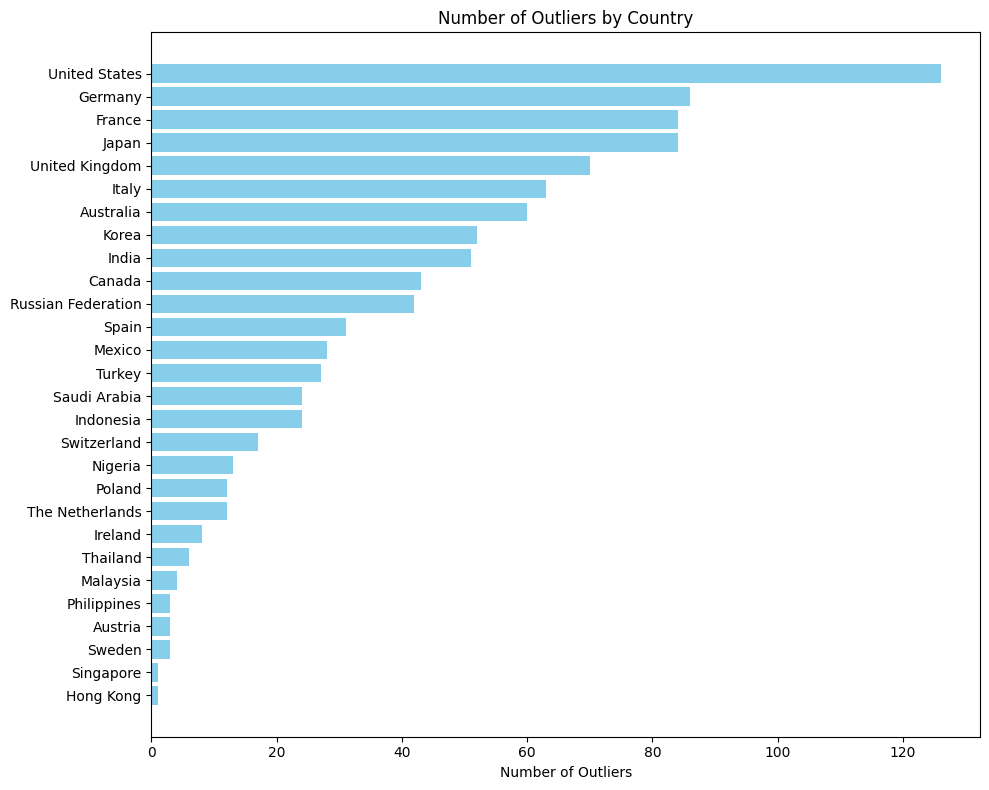

In [13]:
import matplotlib.pyplot as plt

# Calculate IQR
Q1 = filtered_df['Value USD (Million USD)'].quantile(0.25)
Q3 = filtered_df['Value USD (Million USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = filtered_df[(filtered_df['Value USD (Million USD)'] < lower_bound) |
                       (filtered_df['Value USD (Million USD)'] > upper_bound)]

# Count outliers per country
outliers_counts = outliers['Country'].value_counts().reset_index()
outliers_counts.columns = ['Country', 'Number of Outliers']

# Print number of outliers per country
print("Number of outliers per country:")
print(outliers_counts)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(outliers_counts['Country'], outliers_counts['Number of Outliers'], color='skyblue')
plt.xlabel('Number of Outliers')
plt.title('Number of Outliers by Country')
plt.gca().invert_yaxis()  # Invert y-axis to list countries from top to bottom
plt.tight_layout()
plt.show()


In [14]:
# Calculate IQR
Q1 = df_va_section_cleaned['Value USD (Million USD)'].quantile(0.25)
Q3 = df_va_section_cleaned['Value USD (Million USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df_va_section_cleaned[(df_va_section_cleaned['Value USD (Million USD)'] < lower_bound) |
                                 (df_va_section_cleaned['Value USD (Million USD)'] > upper_bound)]

# Print unique countries with outliers
unique_countries_outliers = outliers['Country'].unique()
print("Unique countries with outliers (excluding aggregates):")
print(unique_countries_outliers)
print()

# Print number of outliers per country
outliers_count_per_country = outliers['Country'].value_counts()
print("Number of outliers per country:")
print(outliers_count_per_country)
print()

# Print years of outliers for each country
print("Years of outliers per country:")
for country in unique_countries_outliers:
    country_outliers = outliers[outliers['Country'] == country]
    outlier_years = country_outliers['Year'].unique()
    print(f"{country}: {list(outlier_years)}")


Unique countries with outliers (excluding aggregates):
['Australia' 'Canada' 'Euro Area' 'European Union' 'France' 'Germany'
 'India' 'Indonesia' 'Ireland' 'Italy' 'Japan' 'Korea' 'Mexico' 'Nigeria'
 'Poland' 'Russian Federation' 'Saudi Arabia' 'Spain' 'Switzerland'
 'Thailand' 'The Netherlands' 'Turkey' 'United Kingdom' 'United States']

Number of outliers per country:
Country
United States         126
Euro Area             107
European Union        107
France                 84
Germany                84
Japan                  83
United Kingdom         67
Italy                  56
India                  48
Australia              44
Korea                  35
Russian Federation     35
Canada                 30
Mexico                 25
Indonesia              24
Saudi Arabia           23
Spain                  18
Turkey                 16
Nigeria                12
The Netherlands        12
Switzerland            11
Poland                 10
Ireland                 7
Thailand             

We will keep these outliers in for now as outliers can occur for various reasons (weather, economic fluctuations, policy change, pandemic, etc.) It could also reflect global or regional events impacting the energy sectors differently.

Save this cleaned data to a .csv

In [15]:
df_va_section_cleaned.to_csv('cleaned_data.csv', index=False)

print("Cleaned data saved to cleaned_data.csv")

Cleaned data saved to cleaned_data.csv


**3. Exploratory Data Analysis:**

In [16]:
# Load the cleaned data from CSV
df_cleaned = pd.read_csv('cleaned_data.csv')

# Display the first few rows and check the columns
print(df_cleaned.head())
print(df_cleaned.columns)

   Country  Year ISIC Section ISIC Division  \
0  Albania  2015            A         01-03   
1  Albania  2015            B         05-09   
2  Albania  2015            C         10-33   
3  Albania  2015            D            35   
4  Albania  2015            E         36-39   

                                  ISIC Division Desc               Measure  \
0                  Agriculture, forestry and fishing  Constant 2015 prices   
1                               Mining and quarrying  Constant 2015 prices   
2                                      Manufacturing  Constant 2015 prices   
3  Electricity, gas, steam and air conditioning s...  Constant 2015 prices   
4  Water supply; sewerage, waste management and r...  Constant 2015 prices   

   Value USD (Million USD)  
0                  2252.34  
1                   370.86  
2                   645.81  
3                   366.14  
4                    81.10  
Index(['Country', 'Year', 'ISIC Section', 'ISIC Division',
       'ISIC Di

Filter out aggregates.

In [17]:
# List of aggregates
aggregates = ['ASEAN', 'Asia-Pacific Economic Cooperation', 'Euro Area',
              'Euro area (12 countries)', 'European Union',
              'European Union (13 countries)', 'European Union (15 countries)',
              'European Union (28 countries)', 'G20', 'Non-OECD', 'OECD members',
              'World']

# Filter out rows where 'Country' is not in the aggregates list
df_countries = df_cleaned[~df_cleaned['Country'].isin(aggregates)]

# Calculate the count of unique countries
unique_countries_count = df_countries['Country'].nunique()

# Print the count of unique countries
print(f"Number of unique countries after filtering out aggregates: {unique_countries_count}")


Number of unique countries after filtering out aggregates: 118


Summary Statistics

In [18]:
# Load cleaned data from CSV
df = pd.read_csv('cleaned_data.csv')

# List of aggregates (based on previous information)
aggregates = ['ASEAN', 'Asia-Pacific Economic Cooperation', 'Euro Area', 'Euro area (12 countrie)',
              'European Union', 'European Union (13 countries)', 'European Union (15 countries)',
              'European Union (28 countries)', 'G20', 'Non-OECD', 'OECD members', 'World']

# Filtering out aggregates
df_filtered = df[~df['Country'].isin(aggregates)]

# Summary statistics for numerical variable 'Value USD (Million USD)'
summary_stats = df_filtered['Value USD (Million USD)'].describe()

# Print summary statistics
print("Summary Statistics for 'Value USD (Million USD)' (excluding aggregates):")
print(summary_stats)

# Frequency count for 'Country' (excluding aggregates)
country_counts = df_filtered['Country'].value_counts()
print("\nFrequency of Countries (excluding aggregates):")
print(country_counts)


Summary Statistics for 'Value USD (Million USD)' (excluding aggregates):
count    1.203000e+04
mean     3.328201e+04
std      1.354358e+05
min     -1.720000e+00
25%      3.974425e+02
50%      3.256930e+03
75%      2.856542e+04
max      2.359199e+06
Name: Value USD (Million USD), dtype: float64

Frequency of Countries (excluding aggregates):
Country
Luxembourg         147
Greece             147
Slovak Republic    147
Slovenia           147
Norway             147
                  ... 
Timor-Leste         40
Andorra             40
Jordan              38
North Macedonia     36
New Zealand         30
Name: count, Length: 118, dtype: int64


Count: 12,030 observations

Mean: ~33,282,010 USD

SD: ~ 135,435.800 USD suggesting significant variability

Min/Max: -1.72 USD / 2,359,199,000 USD

Percentiles: 25th (Q1) is ~ 397,442.5 USD; median is 3,256,930 USD; 75th (Q3) is 28,565,420 USD.

Countries like Luxembourg, Greece, Slovak Republic, Slovenia, and Norway show 147 data points each, indicating they have consistent reporting across multiple years or periods.

Some countries, such as New Zealand with 30 data points, have fewer observations, suggesting less frequent reporting or narrower coverage in the dataset.

Interpretation: Value USD (Million USD) has a wide range and variability suggesting the energy value added across countries varies significantly.

Plot top ten countries

In [19]:
# Get top ten countries with outliers

aggregates = ['ASEAN', 'Asia-Pacific Economic Cooperation', 'Euro Area',
              'Euro area (12 countries)', 'European Union',
              'European Union (13 countries)', 'European Union (15 countries)',
              'European Union (28 countries)', 'G20', 'Non-OECD', 'OECD members',
              'World']

# Filter out rows where 'Country' is not in the aggregates list
df_countries = df_cleaned[~df_cleaned['Country'].isin(aggregates)]

# Calculate IQR for 'Value USD (Million USD)'
Q1 = df_countries['Value USD (Million USD)'].quantile(0.25)
Q3 = df_countries['Value USD (Million USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers = df_countries[(df_countries['Value USD (Million USD)'] < lower_bound) |
                         (df_countries['Value USD (Million USD)'] > upper_bound)]

# Count outliers per country
outliers_count_per_country = outliers['Country'].value_counts()

# Get the top 10 countries with most outliers
top_ten_countries_outliers = outliers_count_per_country.head(10)

# Print or further analyze the top ten countries with most outliers
print("Top Ten Countries with Most Outliers:")
print(top_ten_countries_outliers)


Top Ten Countries with Most Outliers:
Country
United States     126
Germany            86
France             84
Japan              84
United Kingdom     70
Italy              63
Australia          60
Korea              52
India              51
Canada             43
Name: count, dtype: int64


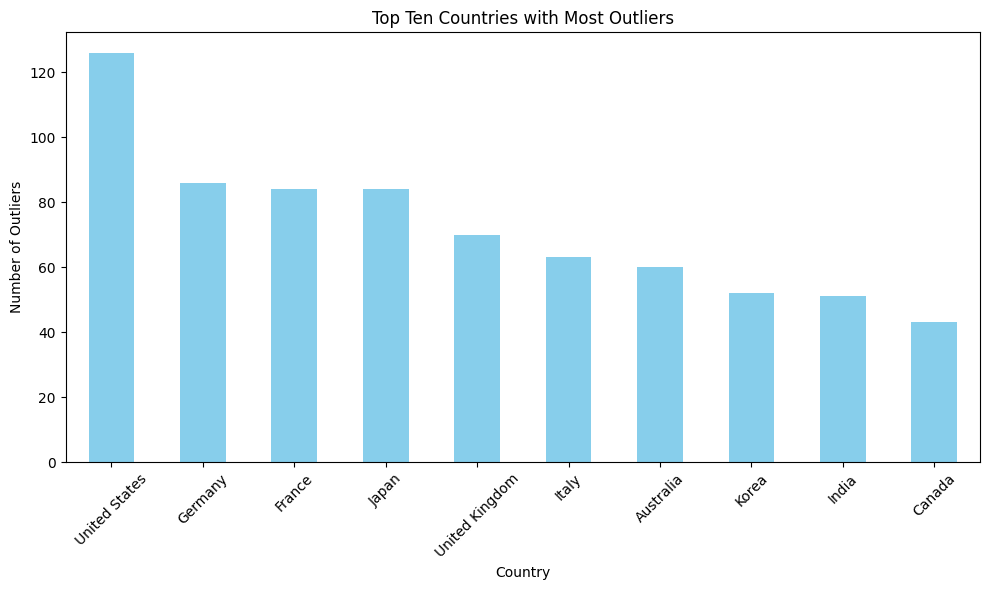

In [20]:
import matplotlib.pyplot as plt

# Top ten countries with most outliers
top_ten_countries_outliers = outliers_count_per_country.head(10)

# Plotting the top ten countries with most outliers
plt.figure(figsize=(10, 6))
top_ten_countries_outliers.plot(kind='bar', color='skyblue')
plt.title('Top Ten Countries with Most Outliers')
plt.xlabel('Country')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Review aggregate outliers

In [21]:
# Load the cleaned data from CSV
df_cleaned = pd.read_csv('cleaned_data.csv')

# List of aggregates
aggregates = ['ASEAN', 'Asia-Pacific Economic Cooperation', 'Euro Area',
              'Euro area (12 countries)', 'European Union',
              'European Union (13 countries)', 'European Union (15 countries)',
              'European Union (28 countries)', 'G20', 'Non-OECD', 'OECD members',
              'World']

# Filter out rows where 'Country' is in the aggregates list
df_aggregates = df_cleaned[df_cleaned['Country'].isin(aggregates)]

# Calculate IQR for Value USD (Million USD)
Q1 = df_aggregates['Value USD (Million USD)'].quantile(0.25)
Q3 = df_aggregates['Value USD (Million USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers_aggregates = df_aggregates[(df_aggregates['Value USD (Million USD)'] < lower_bound) |
                                    (df_aggregates['Value USD (Million USD)'] > upper_bound)]

# Print unique countries with outliers in aggregates
unique_countries_outliers_aggregates = outliers_aggregates['Country'].unique()
print("Unique countries with outliers in aggregates:")
print(unique_countries_outliers_aggregates)

# Print number of outliers in aggregates
print(f"Number of outliers in aggregates: {len(outliers_aggregates)}")


Unique countries with outliers in aggregates:
['Euro Area' 'European Union']
Number of outliers in aggregates: 12


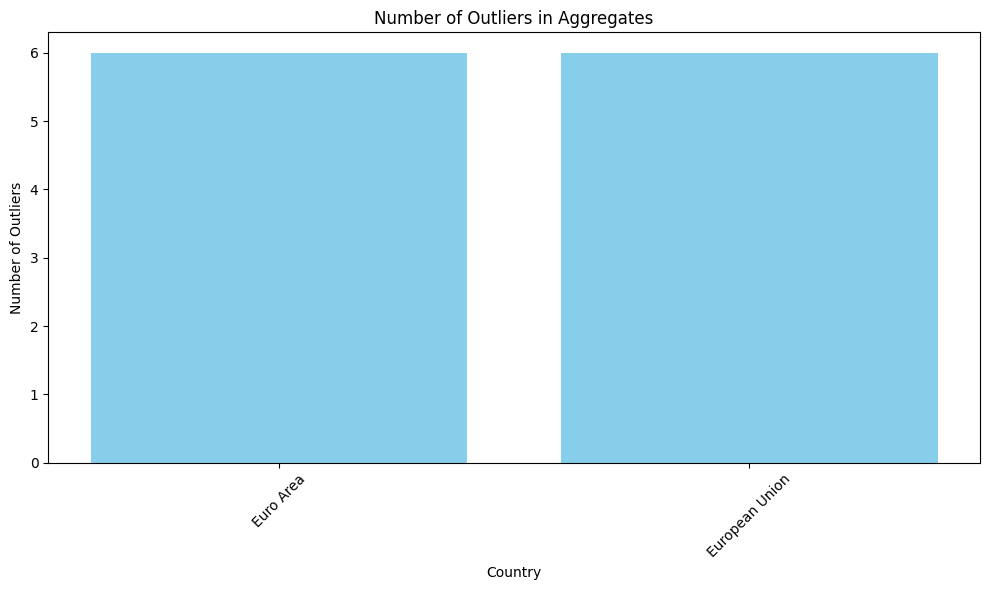

In [22]:
outliers_aggregates = pd.DataFrame({
    'Country': ['Euro Area', 'European Union'],
    'Count': [6, 6]  # Replace with your actual counts
})

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(outliers_aggregates['Country'], outliers_aggregates['Count'], color='skyblue')
plt.title('Number of Outliers in Aggregates')
plt.xlabel('Country')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The presence of outliers across a diverse set of countries that are not confined to the two regions/aggregate outliers suggest they appear to be distributed randomly across various nations. At this point we will retain the outliers in the analysis.

**4. Identify Predictors and Model Selection**

In [23]:
pip install plotly

Index(['Country', 'Year', 'ISIC Section', 'ISIC Division',
       'ISIC Division Desc', 'Measure', 'Value USD (Million USD)'],
      dtype='object')
Summary Statistics for 'Value USD (Million USD)':
count    1.228000e+04
mean     4.409901e+04
std      1.690160e+05
min     -1.720000e+00
25%      4.160700e+02
50%      3.614290e+03
75%      3.271460e+04
max      2.359199e+06
Name: Value USD (Million USD), dtype: float64


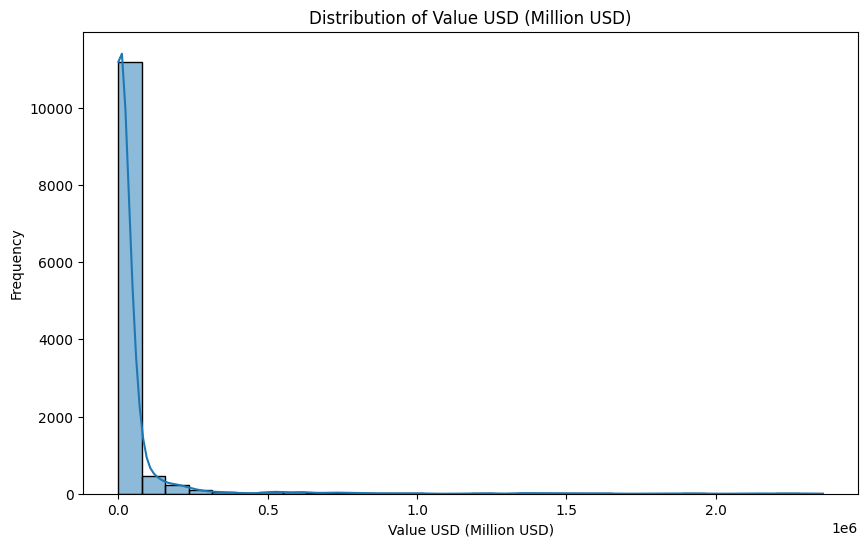

In [24]:
import seaborn as sns
# Load your cleaned dataset
df = pd.read_csv('cleaned_data.csv')

print(df.columns)

# Summary statistics for 'Value USD (Million USD)'
value_stats = df['Value USD (Million USD)'].describe()
print("Summary Statistics for 'Value USD (Million USD)':")
print(value_stats)

plt.figure(figsize=(10, 6))
sns.histplot(df['Value USD (Million USD)'], bins=30, kde=True)
plt.title('Distribution of Value USD (Million USD)')
plt.xlabel('Value USD (Million USD)')
plt.ylabel('Frequency')
plt.show()

The data is skewed with a long right tail indicating few observations have high values compared to the outliers.

In [25]:
# Find the maximum 'Value USD (Million USD)'
max_value = df['Value USD (Million USD)'].max()

# Filter the DataFrame to include only rows where 'Value USD (Million USD)' equals max_value
highest_value_countries = df[df['Value USD (Million USD)'] == max_value]['Country'].unique()

# Check if there are any countries with the highest value
if len(highest_value_countries) > 0:
    print(f"Countries with the highest 'Value USD (Million USD)' ({max_value} million USD):")
    for country in highest_value_countries:
        print(country)
else:
    print(f"No countries found with the highest 'Value USD (Million USD)' ({max_value} million USD).")


Countries with the highest 'Value USD (Million USD)' (2359199.04 million USD):
United States


Correlation Matrix

In [26]:
# Print column name and data type
for column in df.columns:
    print(f"Column: {column}, Data Type: {df[column].dtype}")


Column: Country, Data Type: object
Column: Year, Data Type: int64
Column: ISIC Section, Data Type: object
Column: ISIC Division, Data Type: object
Column: ISIC Division Desc, Data Type: object
Column: Measure, Data Type: object
Column: Value USD (Million USD), Data Type: float64


In [27]:
# Filter out aggregate countries
aggregates = ['ASEAN', 'Asia-Pacific Economic Cooperation', 'Euro Area',
              'Euro area (12 countries)', 'European Union',
              'European Union (13 countries)', 'European Union (15 countries)',
              'European Union (28 countries)', 'G20', 'Non-OECD', 'OECD members',
              'World']
df_filtered = df[~df['Country'].isin(aggregates)]

# Display the first few rows to verify
print(df_filtered.head())

   Country  Year ISIC Section ISIC Division  \
0  Albania  2015            A         01-03   
1  Albania  2015            B         05-09   
2  Albania  2015            C         10-33   
3  Albania  2015            D            35   
4  Albania  2015            E         36-39   

                                  ISIC Division Desc               Measure  \
0                  Agriculture, forestry and fishing  Constant 2015 prices   
1                               Mining and quarrying  Constant 2015 prices   
2                                      Manufacturing  Constant 2015 prices   
3  Electricity, gas, steam and air conditioning s...  Constant 2015 prices   
4  Water supply; sewerage, waste management and r...  Constant 2015 prices   

   Value USD (Million USD)  
0                  2252.34  
1                   370.86  
2                   645.81  
3                   366.14  
4                    81.10  


In [28]:
from sklearn.preprocessing import LabelEncoder

# Define columns of interest
columns_of_interest = ['Country', 'Year', 'ISIC Section', 'Value USD (Million USD)']

# Encode categorical columns
encoder = LabelEncoder()
df['Country_encoded'] = encoder.fit_transform(df['Country'])
df['ISIC Section_encoded'] = encoder.fit_transform(df['ISIC Section'])

# Select columns of interest including encoded categorical and numeric columns
selected_columns = ['Country_encoded', 'Year', 'ISIC Section_encoded', 'Value USD (Million USD)']
df_selected = df[selected_columns]

# Calculate correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         Country_encoded      Year  ISIC Section_encoded  \
Country_encoded                 1.000000  0.007061             -0.006342   
Year                            0.007061  1.000000              0.015452   
ISIC Section_encoded           -0.006342  0.015452              1.000000   
Value USD (Million USD)         0.040200  0.039385             -0.014169   

                         Value USD (Million USD)  
Country_encoded                         0.040200  
Year                                    0.039385  
ISIC Section_encoded                   -0.014169  
Value USD (Million USD)                 1.000000  


Weak Correlations as all are near zero, with the exception of Country_encoded and Value USD (Million USD), which is relatively low. This suggests there is little to no linear relationship between these variables.

Basic Linear Regression model to understand the relationships.

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Load data
df = pd.read_csv('cleaned_data.csv')

# Verify column names
print(df.columns)

# Encode categorical variables
categorical_cols = ['Country', 'ISIC Division Desc']
transformer = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = transformer.fit_transform(df[['Country', 'ISIC Division Desc', 'Year']])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, df['Value USD (Million USD)'], test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Index(['Country', 'Year', 'ISIC Section', 'ISIC Division',
       'ISIC Division Desc', 'Measure', 'Value USD (Million USD)'],
      dtype='object')
R-squared: 0.5673184311763959


This suggests the predictors collectively explain ~ 56.73% of the variability observed in the Value USD (Million USD). It's not close to 1, so it's a moderate fit.

Importance and Significance

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Load data
df = pd.read_csv('cleaned_data.csv')

# Verify column names
print(df.columns)



Index(['Country', 'Year', 'ISIC Section', 'ISIC Division',
       'ISIC Division Desc', 'Measure', 'Value USD (Million USD)'],
      dtype='object')


In [31]:
# Encode categorical variables using OneHotEncoder and ColumnTransformer
categorical_cols = ['Country', 'ISIC Division Desc']
transformer = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = transformer.fit_transform(df[['Country', 'ISIC Division Desc', 'Year']])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, df['Value USD (Million USD)'], test_size=0.2, random_state=42)

# Build and train the model using sklearn LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.5673184311763959


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Select columns of interest
columns_of_interest = ['Country', 'Year', 'ISIC Section', 'Value USD (Million USD)']
df_subset = df[columns_of_interest].copy()  # Use .copy() to explicitly create a copy

# Encode categorical variables
encoder_country = LabelEncoder()
df_subset['Country_encoded'] = encoder_country.fit_transform(df_subset['Country'])

encoder_isic_section = LabelEncoder()
df_subset['ISIC Section_encoded'] = encoder_isic_section.fit_transform(df_subset['ISIC Section'])

# Drop original categorical columns
df_subset.drop(['Country', 'ISIC Section'], axis=1, inplace=True)

# Split data into train and test sets
X = df_subset.drop('Value USD (Million USD)', axis=1)
y = df_subset['Value USD (Million USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Example of feature importance for models like Random Forest
# if using RandomForestRegressor or other models with feature_importances_

# Hyperparameter tuning, cross-validation, and other advanced steps can follow based on results.



Mean Squared Error: 26314505756.281677
R-squared: 0.001959985180817192


Decision Tree Regressor Model excluding aggregates

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Example encoding for illustration
encoder_country = LabelEncoder()
encoder_section = LabelEncoder()

df['Country_encoded'] = encoder_country.fit_transform(df['Country'])
df['ISIC Section_encoded'] = encoder_section.fit_transform(df['ISIC Section'])

# Define predictors and target
predictors = ['Country_encoded', 'Year', 'ISIC Section_encoded']
target = 'Value USD (Million USD)'

# Filter out aggregates from 'Country' column
aggregates = ['Euro Area', 'European Union']
df_filtered = df[~df['Country'].isin(aggregates)]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered[predictors], df_filtered[target], test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model
tree_reg.fit(X_train, y_train)

# Predict on test set
y_pred = tree_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Get feature importances
feature_importances = tree_reg.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': predictors,
                                      'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance:")
print(feature_importance_df)



Mean Squared Error: 47673317.05194359
R-squared: 0.9977456018263334

Feature Importance:
                Feature  Importance
0       Country_encoded    0.570209
2  ISIC Section_encoded    0.426420
1                  Year    0.003371


Mean Squared Error (MSE): The lower MSE indicates a better model perfomance. Here 47673317.05 fairly high.

R-squared (R2): 0.997456 The proportion of variance in the DV Value USD (Million USD) that is predictable from the IV (Country, Year, ISIC Section after encodeing). Closer to 1 indicates that the model explains approximately 99.77% of the variance in the target variable using the predictors included.

Country_encoded has the highest importance (0.5702) indicating it is the most influential predictor in the model.

ISIC Section_encoded has a significant importance (0.4264).

Year is the least at 0.0034 very low.

Overall, this current model that excludes aggregates performs well with the high R-squared value and then the Country_encoded and ISIC Section_encoded.

Random Forest model excluding aggregates

Random Forest is a supervised learning algorithm that falls under the broader umbrella of AI; used for both classification and regression tasks and is often used due to its robustness and effectiveness across a wide range of datasets.

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split


# Filter out aggregates from 'Country' column
aggregates = ['Euro Area', 'European Union']  # List of aggregates

df_filtered = df[~df['Country'].isin(aggregates)].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Example encoding for illustration
encoder_country = LabelEncoder()
encoder_section = LabelEncoder()

df_filtered['Country_encoded'] = encoder_country.fit_transform(df_filtered['Country'])
df_filtered['ISIC Section_encoded'] = encoder_section.fit_transform(df_filtered['ISIC Section'])

# Define predictors and target
predictors = ['Country_encoded', 'Year', 'ISIC Section_encoded']
target = 'Value USD (Million USD)'

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered[predictors], df_filtered[target], test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
forest_reg = RandomForestRegressor(random_state=42)

# Fit the model
forest_reg.fit(X_train, y_train)

# Predict on test set
y_pred = forest_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"Random Forest R-squared: {r2}")

# Get feature importances
feature_importances = forest_reg.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': predictors,
                                      'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance:")
print(feature_importance_df)


Random Forest Mean Squared Error: 110079532.28456974
Random Forest R-squared: 0.9947945074543479

Feature Importance:
                Feature  Importance
0       Country_encoded    0.573185
2  ISIC Section_encoded    0.417928
1                  Year    0.008887


Random Forest Mean Squared Error: 110079532.28456974

Random Forest R-squared: 0.0.9947945074543479

The Random Forest model shows relatively high performance with a high R-squared. It suggests the Country_encoded and ISIC Section_encoded predictors collectively explain about 99.47% of the variance in the target. Year plays a lesser role.

Hyperparameter Tuning for Random Forest to identify what we want to optimize and use a grid or randomized search.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

# Initialize Random Forest Regressor from prior run
forest_reg = RandomForestRegressor(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Perform Grid Search on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameter values found
print("Best Parameters:", grid_search.best_params_)

# Evaluate model with best parameters on test set
best_forest = grid_search.best_estimator_
y_pred = best_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Mean Squared Error (tuned): {mse}")
print(f"Random Forest R-squared (tuned): {r2}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 30, 'n_estimators': 50}
Random Forest Mean Squared Error (tuned): 125842950.0404087
Random Forest R-squared (tuned): 0.9940490795630856


Grid search performs cross-validation with 5 folds  (splitting the data into 5 parts). 12 parameter combinations being evaluated, resulting in 60 fits (5 folds X 12 combinations).

Best set of hyperparameters for the Random Forest model is max_depth=30 and n_estimators=50.

Random Forest R-squared (tuned): 0.9940490795630856 model explains 99.4% of variance and should perform well.

Visualize and explore tuned Random Forest model.

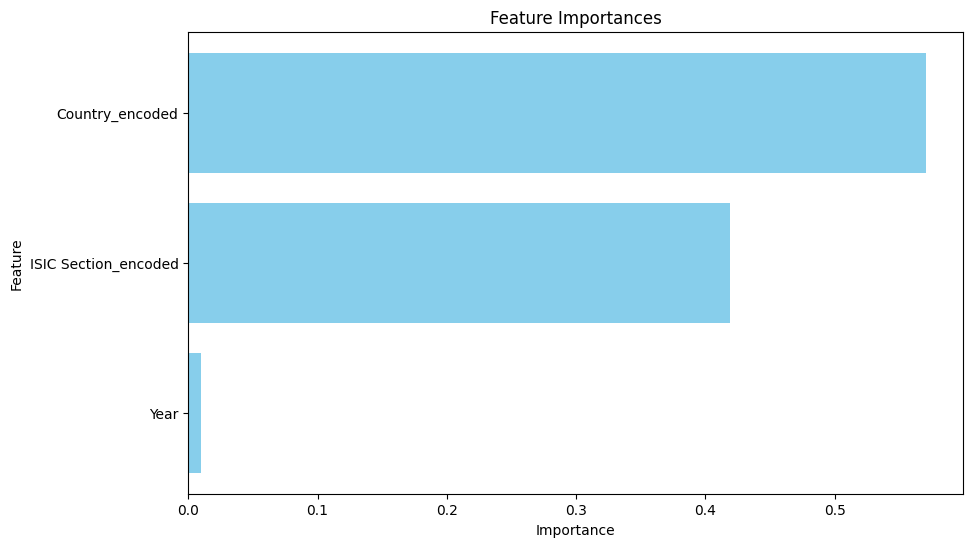


Feature Importance:
                Feature  Importance
0       Country_encoded    0.570923
2  ISIC Section_encoded    0.419019
1                  Year    0.010059


In [36]:
# Extract feature importances from the best estimator
feature_importances = best_forest.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': predictors,
                                      'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature on top
plt.show()

# Display the feature importance table
print("\nFeature Importance:")
print(feature_importance_df)


Country_encoded importance ~57.09% suggests its variations have the most significant impact on the target.

ISIC Section_encoded importance ~41.9% captures variations in economic sectors indicating different economic activities or sectors influence the target.

Year importance ~1.01% suggests changes over time, annual variations, contribute but to a much lesser extent compared to the other 2.

This is important for policy decisions to understand which countries or economic sectors drive the Value USD (Million USD); and important for business strategy to prioritize sectors for investment or resource allocation.

Visualize ISIC Section Map

In [37]:
df = pd.read_csv('cleaned_data.csv')

# Print unique values in 'ISIC Division Desc' column
unique_division_desc = df['ISIC Division Desc'].unique()
print("Unique ISIC Division Desc:")
for desc in unique_division_desc:
    print(desc)


Unique ISIC Division Desc:
Agriculture, forestry and fishing
Mining and quarrying
Manufacturing
Electricity, gas, steam and air conditioning supply
Water supply; sewerage, waste management and remediation activities
Construction
Wholesale and retail trade; repair of motor vehicles and motorcycles
Transportation and storage
Accommodation and food service activities
Information and communication
Financial and insurance activities
Real estate activities
Professional, scientific and technical activities
Administrative and support service activities
Public administration and defence; compulsory social security
Education
Human health and social work activities
Arts, entertainment and recreation
Other service activities
Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use
Activities of extraterritorial organizations and bodies


In [38]:
df = pd.read_csv('cleaned_data.csv')

# List of aggregates to exclude from 'Country' column
aggregates = [
    'ASEAN', 'Asia-Pacific Economic Cooperation', 'Euro Area',
    'Euro area (12 countries)', 'European Union',
    'European Union (13 countries)', 'European Union (15 countries)',
    'European Union (28 countries)', 'G20', 'Non-OECD', 'OECD members',
    'World'
]

# Print unique values in 'Country' column before filtering
print("Unique values in 'Country' column before filtering:")
unique_countries_before = df['Country'].unique()
print(unique_countries_before)

# Filter out rows with aggregates in 'Country' column
df_filtered = df[~df['Country'].isin(aggregates)]

# Print unique values in 'Country' column after filtering
print("\nUnique values in 'Country' column after filtering out aggregates:")
unique_countries_after = df_filtered['Country'].unique()
print(unique_countries_after)

# Print unique values in 'ISIC Division Desc' column before filtering
unique_division_desc = df['ISIC Division Desc'].unique()
print("\nUnique ISIC Division Desc before filtering:")
for desc in unique_division_desc:
    print(desc)

# Print unique values in 'ISIC Division Desc' column after filtering
unique_division_desc_filtered = df_filtered['ISIC Division Desc'].unique()
print("\nUnique ISIC Division Desc after filtering out aggregates:")
for desc in unique_division_desc_filtered:
    print(desc)

Unique values in 'Country' column before filtering:
['Albania' 'Andorra' 'Australia' 'Austria' 'Bahamas' 'Barbados' 'Belgium'
 'Benin' 'Bermuda' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands' 'Chile'
 'Colombia' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominican Republic' 'Ecuador' 'Estonia'
 'Eswatini' 'Euro Area' 'European Union' 'Fiji' 'Finland' 'France'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland' 'Guatemala'
 'Guyana' 'Haiti' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Ireland' 'Islamic Republic Of Iran' 'Israel' 'Italy' 'Japan' 'Jordan'
 'Kenya' 'Korea' 'Laos' 'Latvia' 'Lebanon' 'Leshoto' 'Lithuania'
 'Luxembourg' 'Malawi' 'Malaysia' 'Maldives' 'Malta' 'Marshall Islands'
 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Mozambique' 'Namibia'
 'Nepal' 'New Zealand' 'Niger' 'Nigeria' 'North Macedonia' 'Norway'
 'Pakistan' 'Palau' 'Papua New Guinea' 'Par

In [39]:
# Create a mapping dictionary for ISIC Section and ISIC Division Desc
isic_mapping = {
    'A': 'Agriculture, forestry and fishing',
    'B': 'Mining and quarrying',
    'C': 'Manufacturing',
    'D': 'Electricity, gas, steam and air conditioning supply',
    'E': 'Water supply; sewerage, waste management and remediation activities',
    'F': 'Construction',
    'G': 'Wholesale and retail trade; repair of motor vehicles and motorcycles',
    'H': 'Transportation and storage',
    'I': 'Accommodation and food service activities',
    'J': 'Information and communication',
    'K': 'Financial and insurance activities',
    'L': 'Real estate activities',
    'M': 'Professional, scientific and technical activities',
    'N': 'Administrative and support service activities',
    'O': 'Public administration and defence; compulsory social security',
    'P': 'Education',
    'Q': 'Human health and social work activities',
    'R': 'Arts, entertainment and recreation',
    'S': 'Other services activities',
    'T': 'Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use',
    'U': 'Activities of extraterritorial organizations and bodies'
}

# Aggregate sum of Value USD (Million USD) for each ISIC Section
isic_section_sum = df_filtered.groupby('ISIC Section')['Value USD (Million USD)'].sum().reset_index()

# Sort by descending order of sum
isic_section_sum = isic_section_sum.sort_values(by='Value USD (Million USD)', ascending=False)


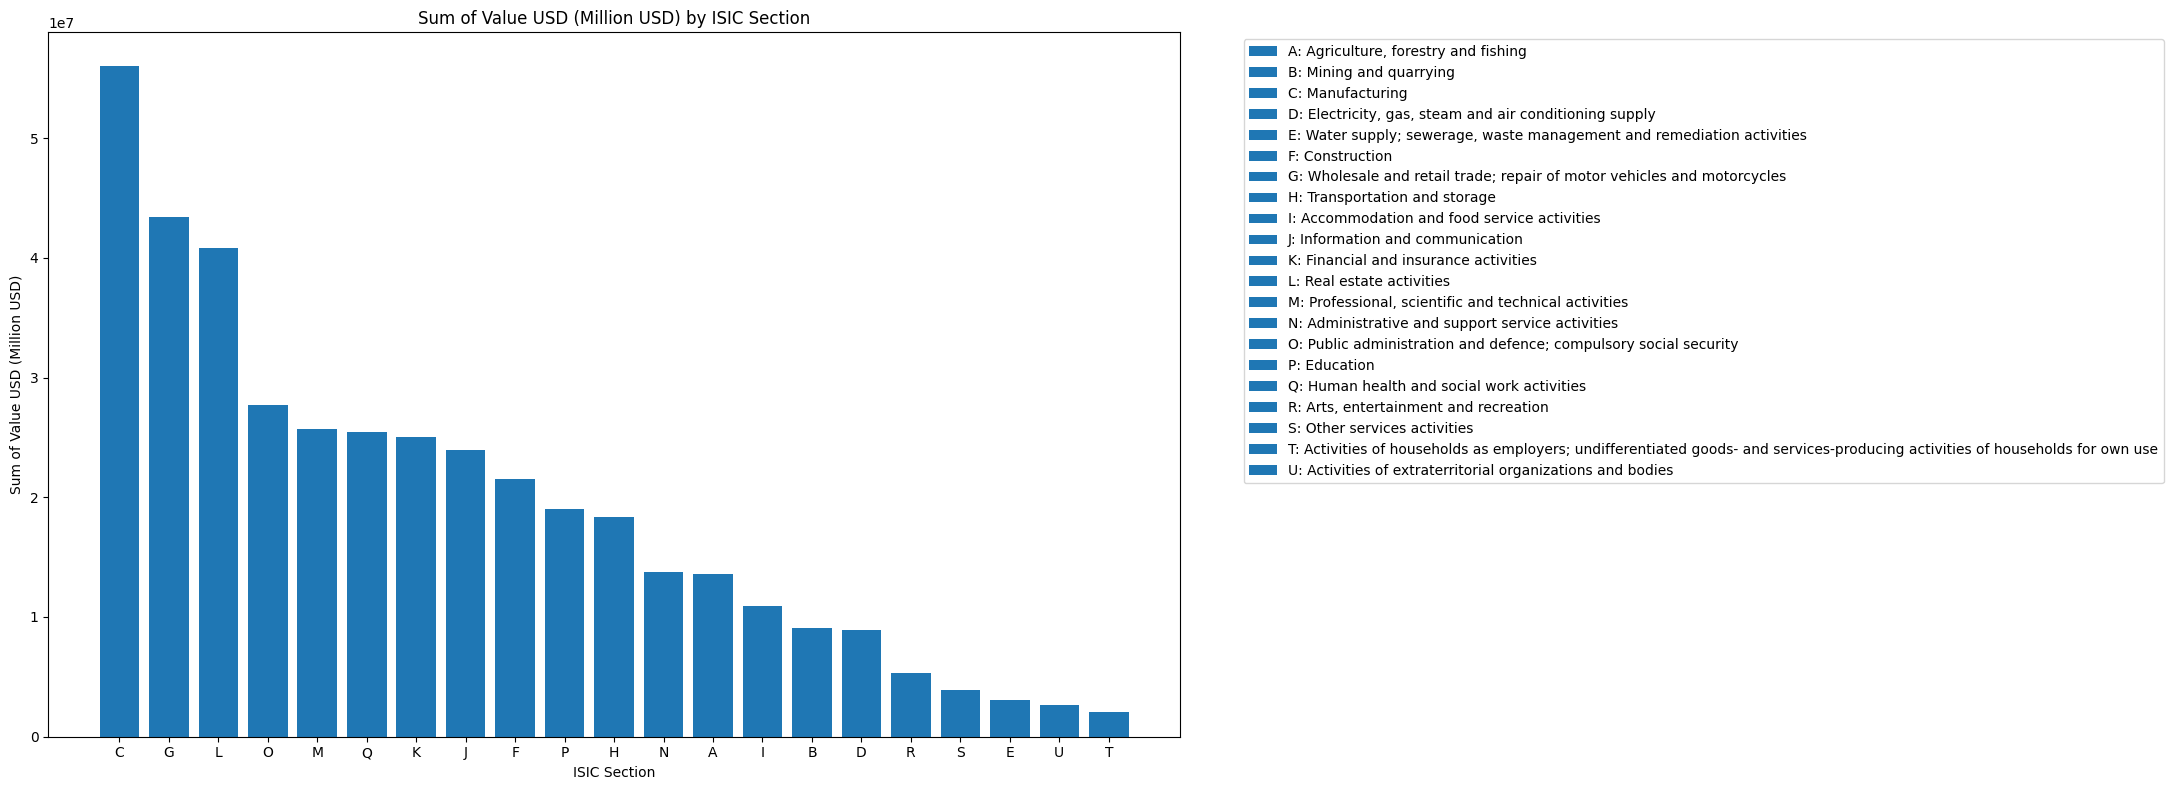

In [40]:
# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(isic_section_sum['ISIC Section'], isic_section_sum['Value USD (Million USD)'])
plt.xlabel('ISIC Section')
plt.ylabel('Sum of Value USD (Million USD)')
plt.title('Sum of Value USD (Million USD) by ISIC Section')
plt.xticks(rotation=0)
plt.tight_layout()

# Create custom legend
legend_labels = [f"{sec}: {desc}" for sec, desc in isic_mapping.items() if sec in isic_section_sum['ISIC Section'].values]
plt.legend(bars, legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

This illustrates the economic landscape represented by the data. C: Manufacturing is the highest total value in USD. This incdicates it is the largest contributor to the economic value reported. The least sector is T: Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use.

Manufacturing may have high levels due to high levels of industrial activity, employment, investment, ability to export.

Sectors similar to household activities being at the bottom suggest they are less economically significant in terms of monetary value. Perhaps due to the fact they are typically small-scale and may not generate substantial commercial revenue.

This is important for resource allocation, policy making, economic planning, development projects, investment decisions, and/or understanding the health of the economy.

**5. Predictive Modeling**

LOOK AT: Yes, 'Country' and 'ISIC Division Desc' can be used to predict 'Value USD (Million USD)' with high accuracy.
Models incorporating 'Country_encoded' and 'ISIC Section_encoded' as predictors achieve high R-squared values (~0.994), indicating strong predictive capability for economic values based on these factors.

In [67]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your cleaned_data.csv into a DataFrame
df = pd.read_csv('cleaned_data.csv')  # Adjust file path as necessary

# Example encoding for illustration
encoder_country = LabelEncoder()
encoder_section = LabelEncoder()

df['Country_encoded'] = encoder_country.fit_transform(df['Country'])
df['ISIC Section_encoded'] = encoder_section.fit_transform(df['ISIC Section'])

# Define predictors and target
predictors = ['Country_encoded', 'Year', 'ISIC Section_encoded']
target = 'Value USD (Million USD)'

# Filter out aggregates from 'Country' column
aggregates = ['Euro Area', 'European Union']
df_filtered = df[~df['Country'].isin(aggregates)]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered[predictors], df_filtered[target], test_size=0.2, random_state=42)

# Initialize Random Forest Regressor with best parameters found
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best hyperparameter values found
print("Best Parameters:", grid_search.best_params_)

# Evaluate model with best parameters on test set
best_forest = grid_search.best_estimator_
y_pred = best_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Mean Squared Error (tuned): {mse}")
print(f"Random Forest R-squared (tuned): {r2}")

# Now assume you have new data for prediction
# Example new data for prediction
new_data = {
    'Country_encoded': [0, 1, 2],  # Example encoded values for countries in new data (adjust as per your encoded values)
    'Year': [2023, 2023, 2023],  # Example values for year in new data
    'ISIC Section_encoded': [0, 1, 2]  # Example encoded values for ISIC sections in new data (adjust as per your encoded values)
}

# Convert new_data into a DataFrame
new_data_df = pd.DataFrame(new_data)

# Predict using the best model (best_forest)
y_pred_new = best_forest.predict(new_data_df)

# y_pred_new now contains the predicted 'Value USD (Million USD)' for the new data
print("Predicted Values (Million USD):", y_pred_new)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 30, 'n_estimators': 50}
Random Forest Mean Squared Error (tuned): 125842950.0404087
Random Forest R-squared (tuned): 0.9940490795630856
Predicted Values (Million USD): [ 1999.3014    88.8744 78124.6096]


In [66]:
print(len(new_data['Country_encoded']))
print(len(new_data['Year']))
print(len(new_data['ISIC Section_encoded']))


3
2
3


Predicted Values (Million USD): [ 1999.3014    88.8744 78124.6096   767.085 ]


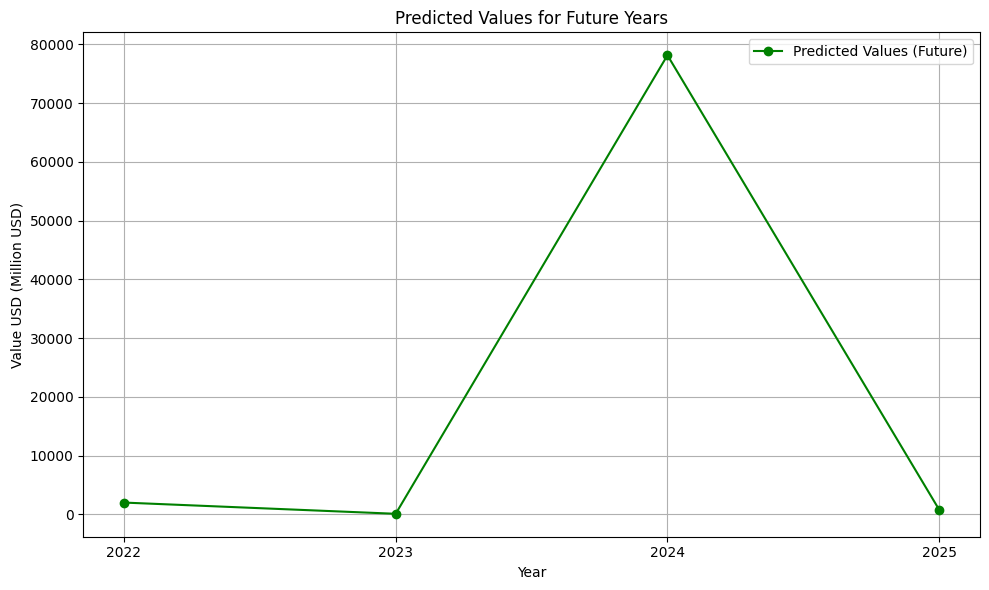

In [72]:
# Example years beyond 2021 for prediction
future_years = np.arange(2022, 2026)  # Adjust based on the years you want to predict

# Example new data for prediction
new_data = {
    'Country_encoded': [0, 1, 2, 0],  # Example encoded values for countries in new data (adjust as per your encoded values)
    'Year': future_years,  # Adjust the years to match the length of Country_encoded and ISIC Section_encoded
    'ISIC Section_encoded': [0, 1, 2, 1]  # Example encoded values for ISIC sections in new data (adjust as per your encoded values)
}

# Ensure all arrays in new_data have the same length
length_check = len(new_data['Country_encoded']) == len(new_data['Year']) == len(new_data['ISIC Section_encoded'])
if not length_check:
    raise ValueError("All arrays in new_data must be of the same length")

# Convert new_data into a DataFrame
new_data_df = pd.DataFrame(new_data)

# Predict using the best model (best_forest)
predicted_values_future = best_forest.predict(new_data_df)

# Print predicted values for verification
print("Predicted Values (Million USD):", predicted_values_future)

# Plotting predicted values for future years only
plt.figure(figsize=(10, 6))
plt.plot(future_years, predicted_values_future, marker='o', linestyle='-', color='g', label='Predicted Values (Future)')
plt.title('Predicted Values for Future Years')
plt.xlabel('Year')
plt.ylabel('Value USD (Million USD)')
plt.xticks(future_years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
# Get feature importances
importances = best_forest.feature_importances_
feature_names = predictors
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)


                      Importance
Country_encoded         0.570923
ISIC Section_encoded    0.419019
Year                    0.010059


Normalize the predictions.

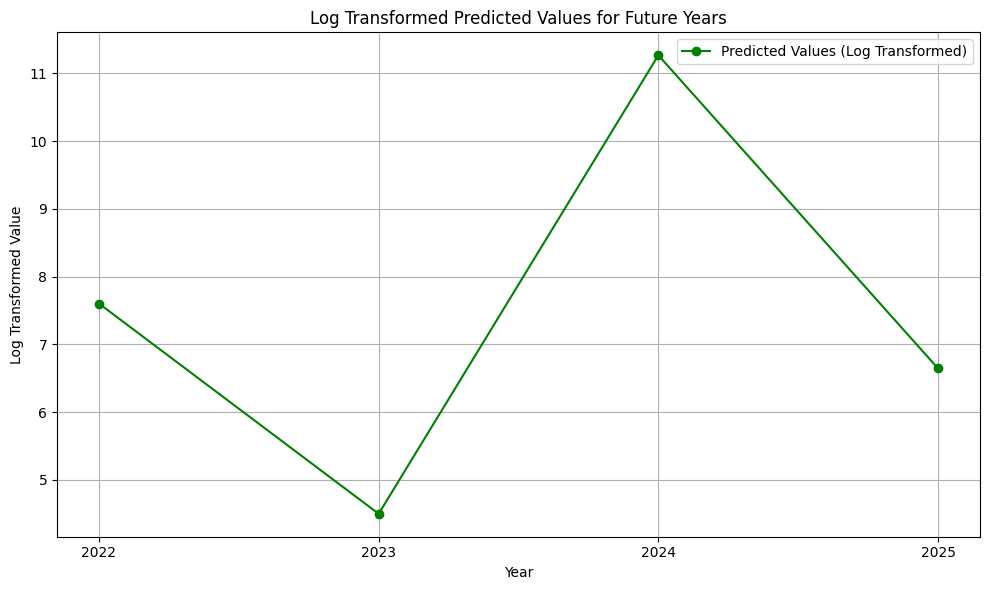

In [76]:
import numpy as np

# Log-transform the predicted values (adding a small constant to avoid log(0))
predicted_values_log = np.log1p(predicted_values_future)

# Plotting log-transformed predicted values
plt.figure(figsize=(10, 6))
plt.plot(future_years, predicted_values_log, marker='o', linestyle='-', color='g', label='Predicted Values (Log Transformed)')
plt.title('Log Transformed Predicted Values for Future Years')
plt.xlabel('Year')
plt.ylabel('Log Transformed Value')
plt.xticks(future_years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
()
plt.show()


Train a simple alternative model (Linear Regression)

In [79]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict using the Linear Regression model
linear_predictions = linear_reg.predict(new_data_df)


Overlay predictions from different models.

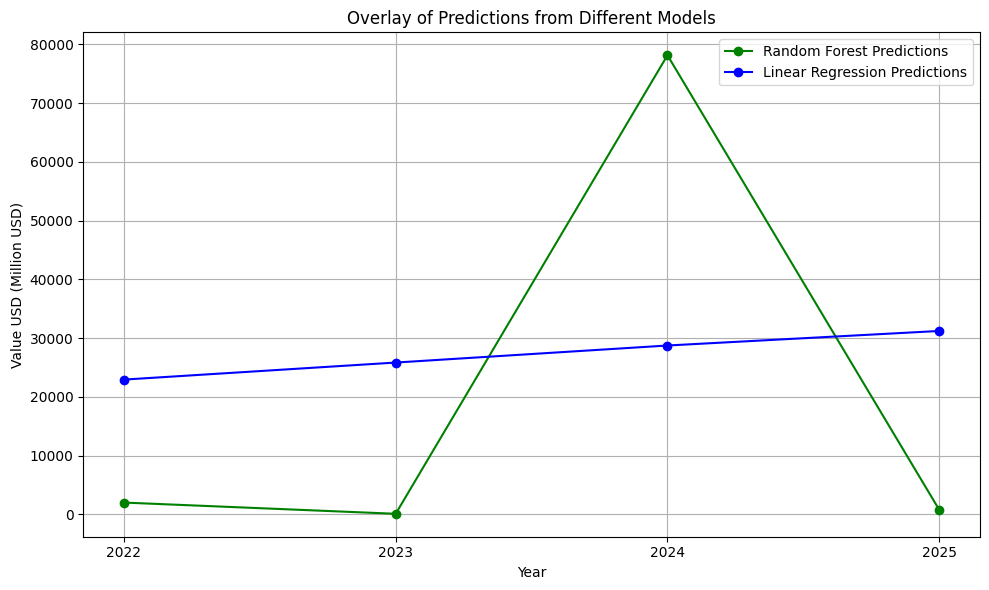

In [80]:
# Assuming 'predicted_values_future' contains the Random Forest predictions
# Plotting predictions from both models
plt.figure(figsize=(10, 6))
plt.plot(future_years, predicted_values_future, marker='o', linestyle='-', color='g', label='Random Forest Predictions')
plt.plot(future_years, linear_predictions, marker='o', linestyle='-', color='b', label='Linear Regression Predictions')
plt.title('Overlay of Predictions from Different Models')
plt.xlabel('Year')
plt.ylabel('Value USD (Million USD)')
plt.xticks(future_years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The Random Forest Model has a strong predictive capability with a big jump in 2024 which may be due to specific patterns or interactions in the data.

The Linear Regression Model reflects a consistend increase over the years indicating a linear relatinship between the features and the target, without sharp jumst observed, and provides a more steady prediction.

**5. Interpretation and Insights Integration:**

Summary of Findings:

    Data Overview:
        The dataset comprises 12,030 observations of 'Value USD (Million USD)', showcasing a wide range from -1.72 to 2,359,199,000 USD.
        Outliers are distributed across various countries, with notable contributions from the United States and Germany.

    Predictive Modeling Insights:
        The Random Forest model shows high accuracy (R-squared ~0.994) but has unpredictable jumps in future predictions. Linear Regression provides a more stable trend, indicating that while predictions are possible, their accuracy can vary significantly depending on the model used.

    Sector Analysis:
        Manufacturing emerges as the leading sector in economic value, driven by industrial activity, employment levels, and export capacity.
        Sectors resembling household activities show lower economic impact, likely due to their smaller scale and revenue generation.

    Implications and Recommendations:
        Insights are valuable for policy-making, economic planning, and investment decisions to optimize resource allocation and foster economic stability.
        Further refinement of models and exploration of additional variables could enhance predictive accuracy and deepen understanding of economic dynamics.

Research questions:

How does 'Value USD (Million USD)' vary across different countries?

    'Value USD (Million USD)' varies significantly across countries, ranging from -1.72 USD to 2,359,199,000 USD.
    Countries like the United States, Germany, and others exhibit diverse economic contributions, with outliers indicating substantial economic activities.

What is the impact of industrial sectors (ISIC divisions) on 'Value USD (Million USD)'?

    Industrial sectors, categorized by ISIC divisions, play a crucial role in influencing 'Value USD (Million USD)'.
    Manufacturing sectors, characterized by high industrial activity and export potential, emerge as primary contributors to economic value.

Which specific countries contribute the most to variations in 'Value USD (Million USD)'?

    Countries such as the United States, Germany, and others contribute significantly to variations in 'Value USD (Million USD)' due to their substantial economic outputs and diverse industrial sectors.

How do different industrial sectors (ISIC divisions) impact 'Value USD (Million USD)'?

    Different ISIC divisions impact 'Value USD (Million USD)' differently based on their economic activities and sector-specific contributions.
    Sectors like manufacturing demonstrate higher economic impact compared to sectors resembling household activities, which typically generate lower economic value.

Can 'Country' and 'ISIC Division Desc' be used to predict 'Value USD (Million USD)' accurately?

    The Random Forest model shows high accuracy (R-squared ~0.994) but has unpredictable jumps in future predictions. Linear Regression provides a more stable trend, indicating that while predictions are possible, their accuracy can vary significantly depending on the model used.
